In [87]:
# Import the common packages for exploring Machine Learning
import numpy as np  # <-- common convention for short names of packages...
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import matplotlib

In [88]:
# Load housing data into DataFrame (Pandas reads & writes CSVs and many other data formats)
# data source: linked from https://ww2.amstat.org/publications/jse/v19n3/decock.pdf 

# Download this file to our Jupyter filesystem
!wget http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt
# file is 'Tab Separated' with a generic extension, so tell Pandas which separator to use:  \t
df = pd.read_csv('AmesHousing.txt',sep='\t')

--2018-03-02 21:31:55--  http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt
Resolving www.amstat.org (www.amstat.org)... 50.205.225.65
Connecting to www.amstat.org (www.amstat.org)|50.205.225.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt [following]
--2018-03-02 21:31:56--  https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt
Resolving ww2.amstat.org (ww2.amstat.org)... 50.205.225.74
Connecting to ww2.amstat.org (ww2.amstat.org)|50.205.225.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 963738 (941K) [text/plain]
Saving to: ‘AmesHousing.txt.5’

AmesHousing.txt.5   100%[===================>] 941.15K   301KB/s    in 3.1s    

2018-03-02 21:32:00 (301 KB/s) - ‘AmesHousing.txt.5’ saved [963738/963738]



In [89]:
# DataFrames in Pandas are easy to sample or use head(n) or tail(n)

# df.head(3)
# df.tail(3)
df.sample(3)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2249,2250,914452190,20,RL,71.0,9187,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,134000
555,556,532353130,20,RL,71.0,7064,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,135000
1243,1244,535180100,20,RL,75.0,9464,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,136000


In [90]:
# Wow, 82 is lots of columns - let's sort them so we can find what we're lookinvg for easier
df.columns.sort_values()

Index(['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Alley', 'Bedroom AbvGr',
       'Bldg Type', 'Bsmt Cond', 'Bsmt Exposure', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Bsmt Qual', 'Bsmt Unf SF', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Central Air',
       'Condition 1', 'Condition 2', 'Electrical', 'Enclosed Porch',
       'Exter Cond', 'Exter Qual', 'Exterior 1st', 'Exterior 2nd', 'Fence',
       'Fireplace Qu', 'Fireplaces', 'Foundation', 'Full Bath', 'Functional',
       'Garage Area', 'Garage Cars', 'Garage Cond', 'Garage Finish',
       'Garage Qual', 'Garage Type', 'Garage Yr Blt', 'Gr Liv Area',
       'Half Bath', 'Heating', 'Heating QC', 'House Style', 'Kitchen AbvGr',
       'Kitchen Qual', 'Land Contour', 'Land Slope', 'Lot Area', 'Lot Config',
       'Lot Frontage', 'Lot Shape', 'Low Qual Fin SF', 'MS SubClass',
       'MS Zoning', 'Mas Vnr Area', 'Mas Vnr Type', 'Misc Feature', 'Misc Val',
       'Mo Sold', 'Neighborhood', 'Open Porch S

In [91]:
# Maybe we want to grab just a subset of data columns - it's easy with Pandas. 
# Don't forget the double [[]] syntax for multiple selections

df2 = df[['SalePrice','Lot Area','Bedroom AbvGr','Year Built','Yr Sold','1st Flr SF', '2nd Flr SF','BsmtFin SF 1','BsmtFin SF 2']]
df2.head(3)

,SalePrice,Lot Area,Bedroom AbvGr,Year Built,Yr Sold,1st Flr SF,2nd Flr SF,BsmtFin SF 1,BsmtFin SF 2
0,215000,31770,3,1960,2010,1656,0,639.0,0.0
1,105000,11622,2,1961,2010,896,0,468.0,144.0
2,172000,14267,3,1958,2010,1329,0,923.0,0.0


In [92]:
# Pandas maybe you want to engineer a new aggregate feature column
# It's easy to do opeations across columns (eg. add all the Square Footage columns into a new one 'Total SF')
df3 = pd.DataFrame(df2['1st Flr SF']+df2['2nd Flr SF']+df2['BsmtFin SF 1']+df2['BsmtFin SF 2'], columns=['Total SF'])
df3.head(10)

,Total SF
0,2295.0
1,1508.0
2,2252.0
3,3175.0
4,2420.0
5,2206.0
6,1954.0
7,1543.0
8,2796.0
9,1804.0


In [93]:
# Combining DataFrame's is easy to
# use 'axis=1' for adding columns (features); 'axis=0' for more rows (examples)
df4 = pd.concat([df2,df3],axis=1) 
df4.sample(3) # <-- now we have a new 'Total SF' feature column appended

,SalePrice,Lot Area,Bedroom AbvGr,Year Built,Yr Sold,1st Flr SF,2nd Flr SF,BsmtFin SF 1,BsmtFin SF 2,Total SF
1215,145500,10007,3,1959,2008,1053,0,806.0,0.0,1859.0
190,140750,10560,2,1922,2010,868,602,283.0,0.0,1753.0
1198,170000,13355,4,1971,2008,845,825,583.0,0.0,2253.0


In [94]:
# Logistic Regression
# Let's see if we can predict a Sale Price based on single feature 'Gross Living Area'
# Create a new DataFrame with only the data we need
data = df[['SalePrice','Gr Liv Area']]
data.head(5)

,SalePrice,Gr Liv Area
0,215000,1656
1,105000,896
2,172000,1329
3,244000,2110
4,189900,1629


# TODO:  Insert other charts to explore data:  histograms, etc

<IPython.core.display.Javascript object>


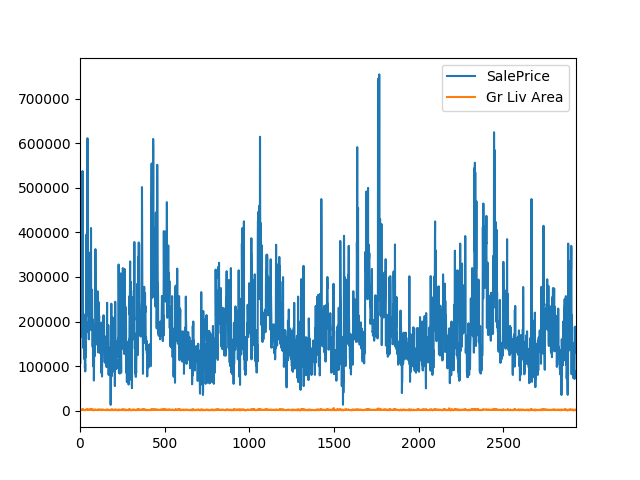

In [95]:
%matplotlib notebook
data.plot()
# data.plot(kind='line',logy=True) # <-- maybe we should try log scaling if we're visualizing different data scales



In [96]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Use only one feature 'Total SF' to predict 'SalePrice'
X = data['Gr Liv Area'].values.reshape(-1,1) #sklearn complains if these are shape [100,] vs [100,1]
y = data['SalePrice'].values.reshape(-1,1)

<IPython.core.display.Javascript object>


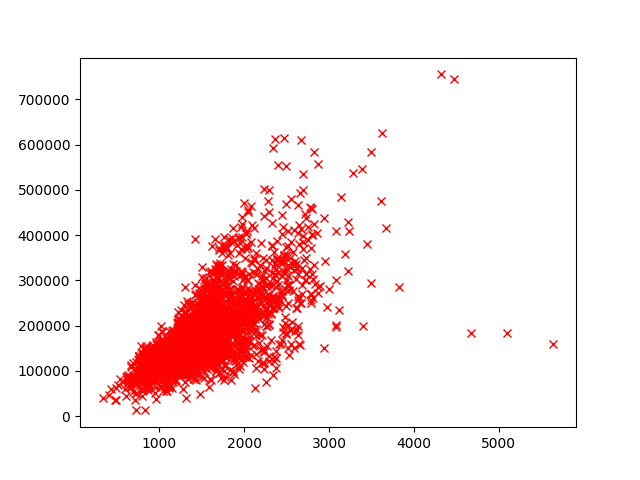

In [97]:
%matplotlib notebook
# Let's plot Square Foot vs Sale Price to understand our data
plt.plot(X,y,'rx')

In [98]:
# use SKLearns builtin method to split our data & shuffle it into test & train
# Split the data into training/testing sets
housing_X_train, housing_X_test, housing_y_train, housing_y_test = train_test_split(X,y)
print('housing_X_train',len(housing_X_train),'examples')
print('housing_X_test',len(housing_X_test),'examples')
print('housing_y_train',len(housing_y_train),'examples')
print('housing_y_test',len(housing_y_test),'examples')

# Create linear regression object
regr = linear_model.LinearRegression(normalize=True)
# regr = linear_model.SGDRegressor(n_iter=100)


housing_X_train 2197 examples
housing_X_test 733 examples
housing_y_train 2197 examples
housing_y_test 733 examples


In [99]:
# Exporting CSVs is easy too
# data.to_csv('housing_sf_price.tsv',sep='\t',)

In [100]:
# Train the model using the training setst
regr.fit(housing_X_train, housing_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [101]:
# Make predictions using the testing set
housing_y_pred = regr.predict(housing_X_test)

# The coefficients
# print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(housing_y_test, housing_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(housing_y_test, housing_y_pred))



Mean squared error: 3498171260.84
Variance score: 0.51


<IPython.core.display.Javascript object>


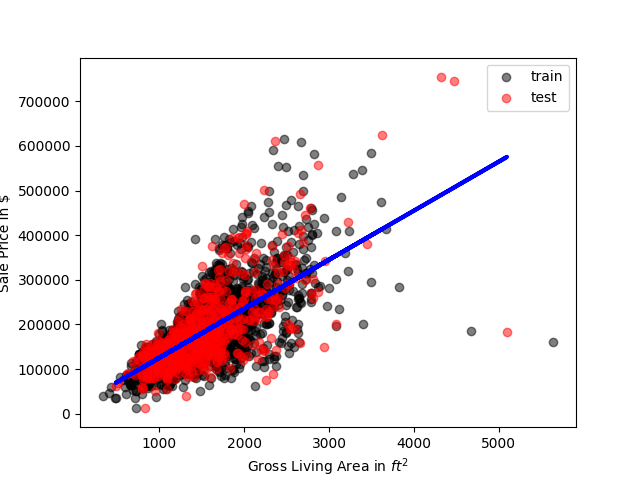

In [102]:
%matplotlib notebook

# Plot outputs
plt.scatter(housing_X_train, housing_y_train, alpha=.5, color='black', label='train')
plt.scatter(housing_X_test, housing_y_test, alpha=.5, color='red', label='test')
plt.plot(housing_X_test, housing_y_pred,color='blue', linewidth=3)

plt.xticks()
plt.yticks()
plt.legend()
plt.xlabel('Gross Living Area in $ft^2$')
plt.ylabel('Sale Price in $')

plt.show()

In [106]:
# sklearn.neural_network.MLPRegressor
# sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, 
# batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
# random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
# early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
from sklearn.neural_network import MLPRegressor

# TODO:
# Plucked out numerical columns 
# Not touching on featurizing yet
# However we are scaling/centering data

# Use all numerical columns to predict 'SalePrice'
columns = list(['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Bedroom AbvGr','Bsmt Full Bath','Bsmt Half Bath', 'Bsmt Unf SF', 'BsmtFin SF 1','BsmtFin SF 2','Enclosed Porch','Fireplaces','Full Bath','Garage Area', 'Garage Cars','Garage Yr Blt', 'Gr Liv Area','Half Bath', 'Kitchen AbvGr','Lot Area','Lot Frontage', 'Low Qual Fin SF','Mas Vnr Area','Mo Sold', 'Open Porch SF','Pool Area','TotRms AbvGrd', 'Total Bsmt SF','Wood Deck SF', 'Year Built', 'Year Remod/Add', 'Yr Sold'])
print(columns)
# Create new dataframe with columns
X = df[columns]
print(X.shape)
#sklearn complains if these are shape [100,] vs [100,1]
y = df['SalePrice'].values.reshape(-1,1)
print(y.shape)
# remove NaN values & replace with 0's
X = X.fillna(0)
X = X.values # convert to plain NumPy array

# TODO: scaling & centering data
# scale & center our data
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)

# use SKLearns builtin method to split our data & shuffle it into test & train
# Split the data into training/testing sets
housing_X_train_nn, housing_X_test_nn, housing_y_train_nn, housing_y_test_nn = train_test_split(X_scaled,y)
print('housing_X_train',len(housing_X_train_nn),'examples')
print('housing_X_test',len(housing_X_test_nn),'examples')
print('housing_y_train',len(housing_y_train_nn),'examples')
print('housing_y_test',len(housing_y_test_nn),'examples')

# More data feature columns


# Explore settings logarithmically (0.1, 0.01, 0.001, 0.00001)
nn_regr = MLPRegressor(hidden_layer_sizes=(20,5), learning_rate_init=0.01, activation='relu',max_iter=2000,verbose=True)
nn_regr.fit(housing_X_train_nn,housing_y_train_nn.reshape(housing_y_train_nn.size))

# Make predictions using the testing set
housing_y_pred_nn = nn_regr.predict(housing_X_test_nn)

print("Mean squared error: %.2f" % mean_squared_error(housing_y_test_nn, housing_y_pred_nn))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(housing_y_test_nn, housing_y_pred_nn))


['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Bedroom AbvGr', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Enclosed Porch', 'Fireplaces', 'Full Bath', 'Garage Area', 'Garage Cars', 'Garage Yr Blt', 'Gr Liv Area', 'Half Bath', 'Kitchen AbvGr', 'Lot Area', 'Lot Frontage', 'Low Qual Fin SF', 'Mas Vnr Area', 'Mo Sold', 'Open Porch SF', 'Pool Area', 'TotRms AbvGrd', 'Total Bsmt SF', 'Wood Deck SF', 'Year Built', 'Year Remod/Add', 'Yr Sold']
(2930, 31)
(2930, 1)
housing_X_train 2197 examples
housing_X_test 733 examples
housing_y_train 2197 examples
housing_y_test 733 examples
Iteration 1, loss = 19532106005.05009460
Iteration 2, loss = 19531752678.69815445
Iteration 3, loss = 19530943174.50207138
Iteration 4, loss = 19529230988.08174133
Iteration 5, loss = 19525936023.07921219
Iteration 6, loss = 19520071972.19672012
Iteration 7, loss = 19510262639.08799362
Iteration 8, loss = 19495725324.68064499
Iteration 9, loss = 19474238727.39054108
Iteration 10, los

Iteration 191, loss = 1121836218.98176050
Iteration 192, loss = 1114583983.39724326
Iteration 193, loss = 1109179591.74848413
Iteration 194, loss = 1102160804.31551671
Iteration 195, loss = 1096398618.87373662
Iteration 196, loss = 1090526461.65021968
Iteration 197, loss = 1084508934.53782153
Iteration 198, loss = 1078373411.16595745
Iteration 199, loss = 1072857059.36913002
Iteration 200, loss = 1067571518.28081083
Iteration 201, loss = 1062894943.12995815
Iteration 202, loss = 1055895708.58963835
Iteration 203, loss = 1050998033.87841463
Iteration 204, loss = 1045811430.49575794
Iteration 205, loss = 1040219647.55486262
Iteration 206, loss = 1035150585.77434206
Iteration 207, loss = 1030918087.44895780
Iteration 208, loss = 1025121378.97483277
Iteration 209, loss = 1020384578.50428450
Iteration 210, loss = 1015711181.20276630
Iteration 211, loss = 1011096677.41228807
Iteration 212, loss = 1006642866.37322485
Iteration 213, loss = 1001988309.22631335
Iteration 214, loss = 997662742.82

Iteration 412, loss = 610922263.60639429
Iteration 413, loss = 610551043.36867118
Iteration 414, loss = 609361262.84288275
Iteration 415, loss = 608748302.11473227
Iteration 416, loss = 607613011.27367413
Iteration 417, loss = 606852820.67170656
Iteration 418, loss = 606540967.89169383
Iteration 419, loss = 605504709.66361451
Iteration 420, loss = 604646980.87741268
Iteration 421, loss = 603690463.69384193
Iteration 422, loss = 603362550.51178050
Iteration 423, loss = 602069942.03370523
Iteration 424, loss = 601486271.26779783
Iteration 425, loss = 600586047.97391951
Iteration 426, loss = 600010444.52879131
Iteration 427, loss = 598998518.41925132
Iteration 428, loss = 598144750.84561992
Iteration 429, loss = 598741068.18835497
Iteration 430, loss = 596644962.19213581
Iteration 431, loss = 596265065.22041905
Iteration 432, loss = 595369418.35278583
Iteration 433, loss = 594828263.82850051
Iteration 434, loss = 593922605.83494842
Iteration 435, loss = 593460923.28322768
Iteration 436, l

Iteration 621, loss = 526424879.40338320
Iteration 622, loss = 526380853.95300931
Iteration 623, loss = 526167300.56896925
Iteration 624, loss = 526080501.00865036
Iteration 625, loss = 525366542.48863620
Iteration 626, loss = 525584922.22849905
Iteration 627, loss = 525164392.99876595
Iteration 628, loss = 525003991.20831263
Iteration 629, loss = 525333392.98386151
Iteration 630, loss = 524522008.44602036
Iteration 631, loss = 524841310.63456172
Iteration 632, loss = 524340029.82171255
Iteration 633, loss = 524351389.68164796
Iteration 634, loss = 524157425.64781141
Iteration 635, loss = 523796942.64407152
Iteration 636, loss = 524301601.59191412
Iteration 637, loss = 523630000.46052623
Iteration 638, loss = 523260083.60568458
Iteration 639, loss = 523083097.63915491
Iteration 640, loss = 522968730.03054857
Iteration 641, loss = 523221823.89394039
Iteration 642, loss = 522850021.32808566
Iteration 643, loss = 522541507.66240972
Iteration 644, loss = 522244323.87473410
Iteration 645, l

31


<IPython.core.display.Javascript object>


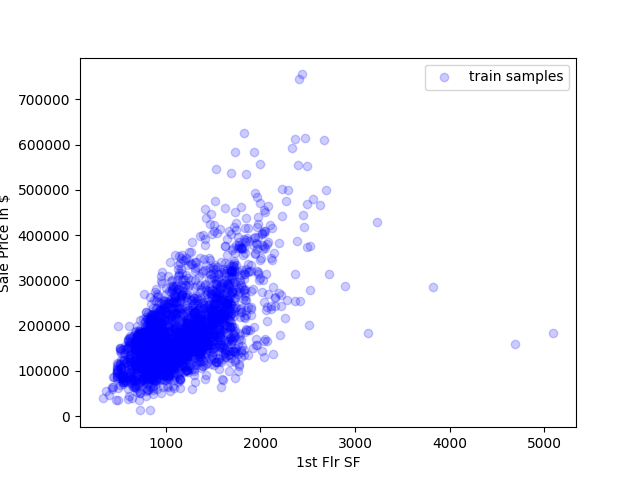

<IPython.core.display.Javascript object>


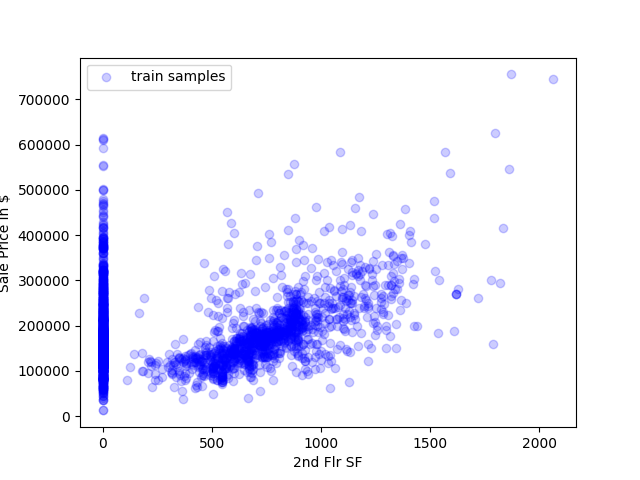

<IPython.core.display.Javascript object>


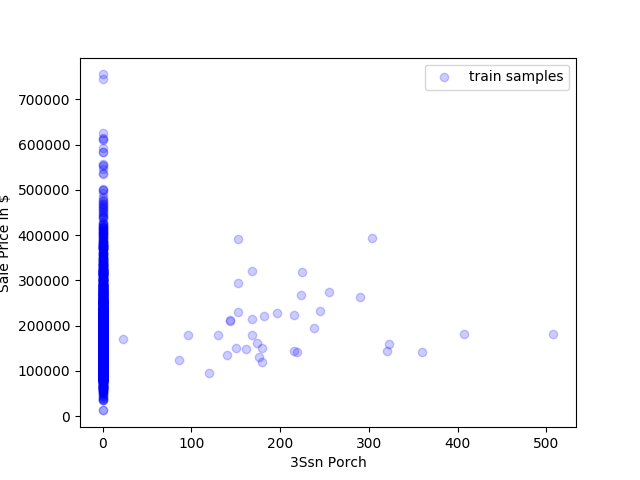

<IPython.core.display.Javascript object>


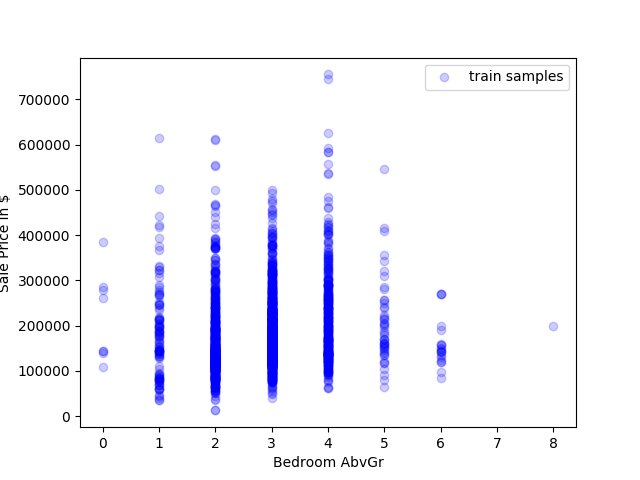

<IPython.core.display.Javascript object>


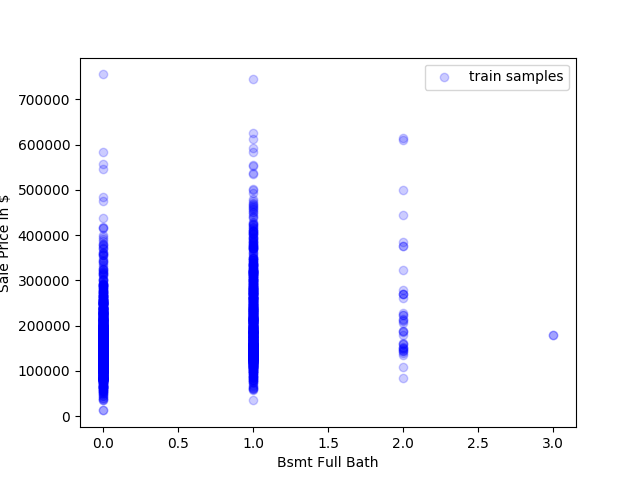

<IPython.core.display.Javascript object>


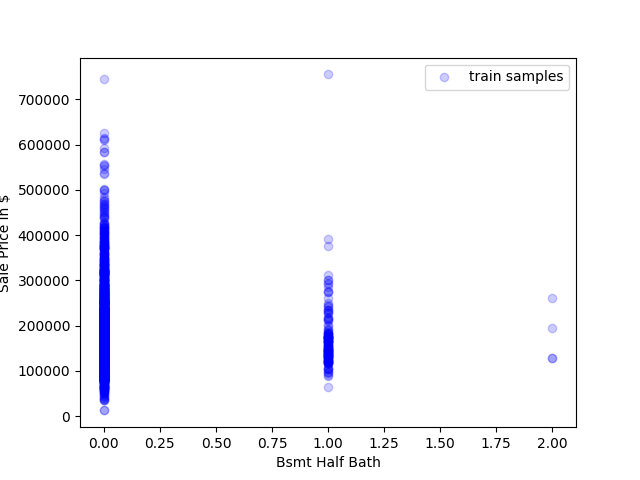

<IPython.core.display.Javascript object>


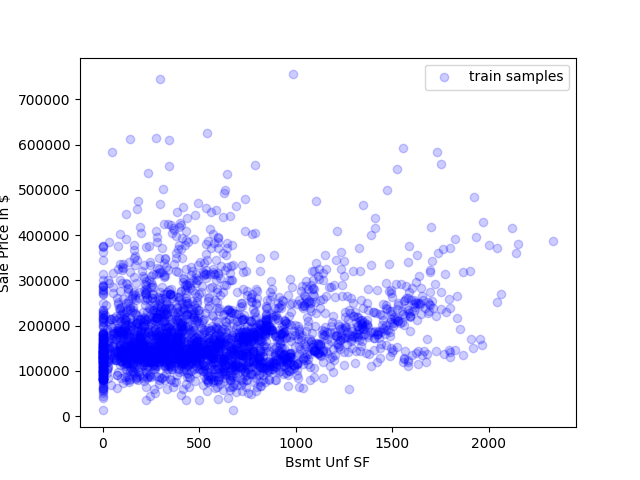

<IPython.core.display.Javascript object>


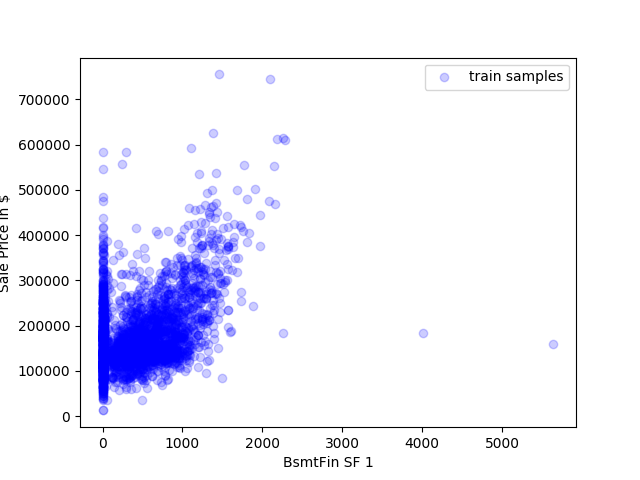

<IPython.core.display.Javascript object>


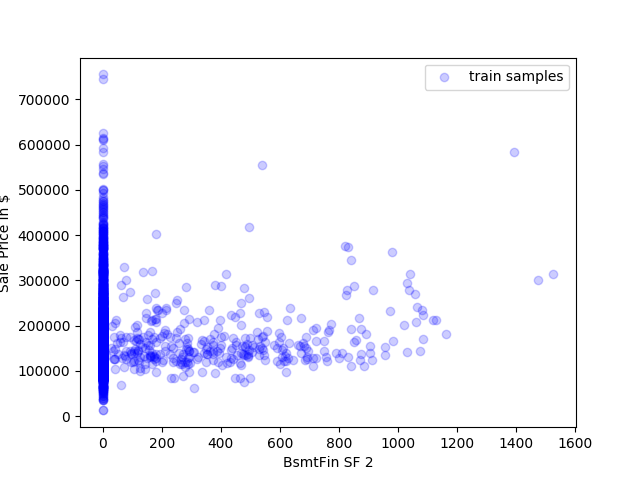

<IPython.core.display.Javascript object>


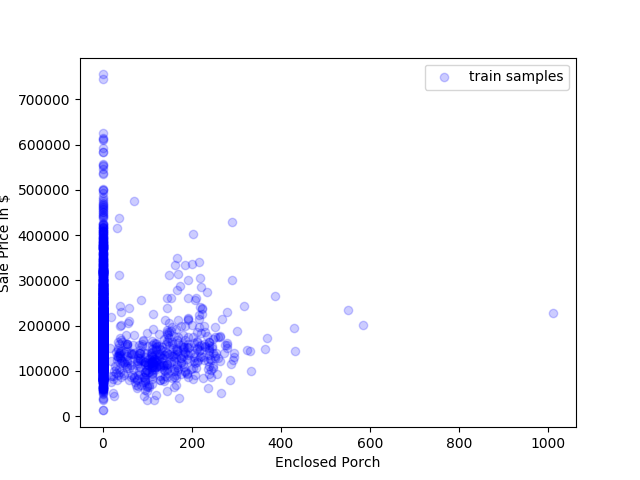

<IPython.core.display.Javascript object>


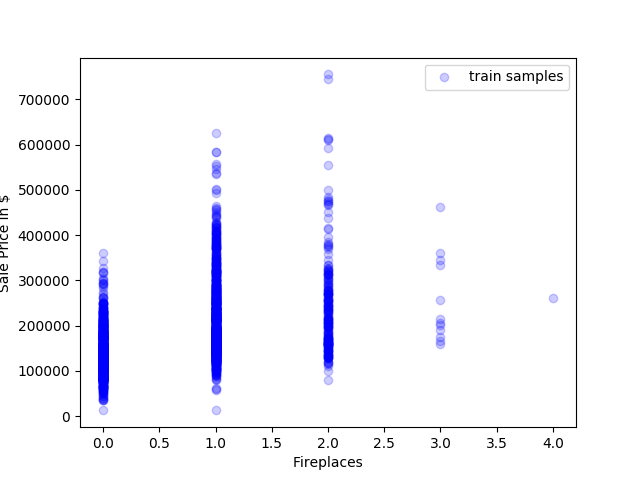

<IPython.core.display.Javascript object>


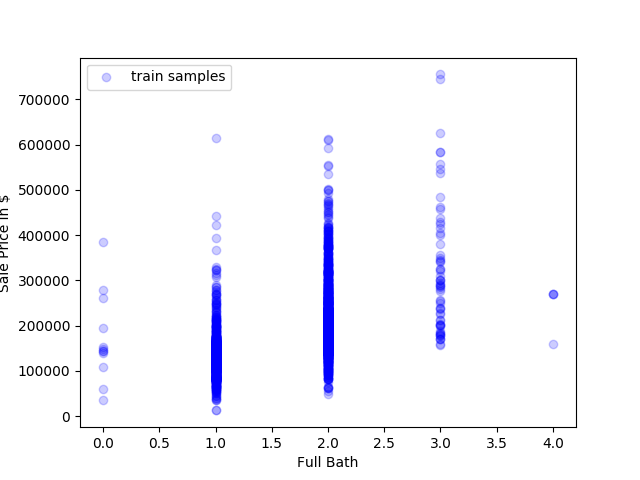

<IPython.core.display.Javascript object>


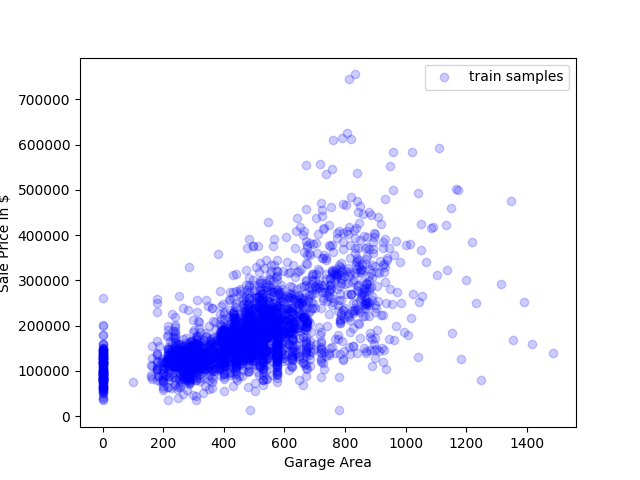

<IPython.core.display.Javascript object>


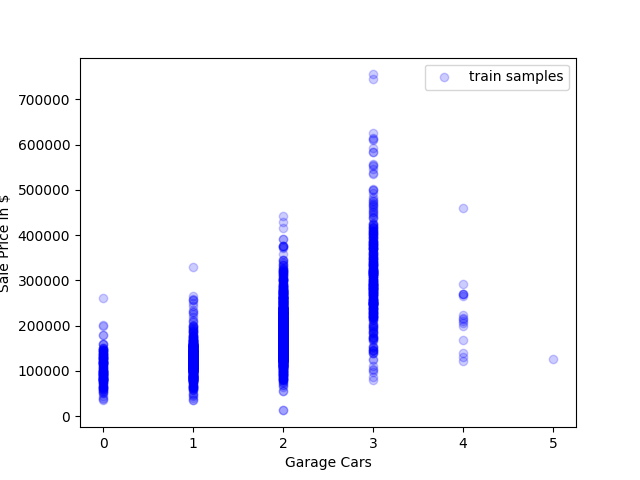

<IPython.core.display.Javascript object>


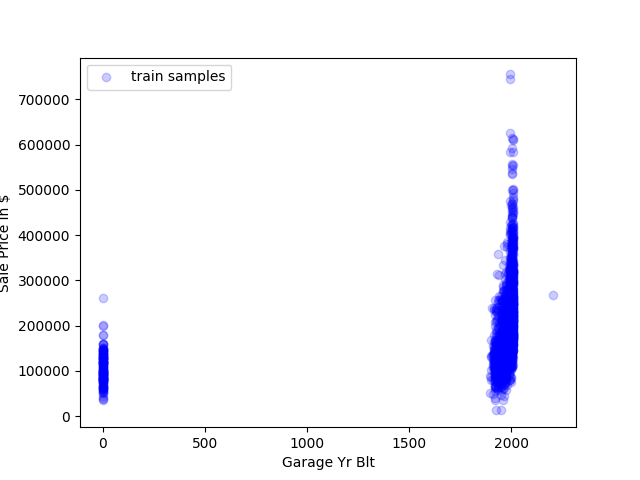

<IPython.core.display.Javascript object>


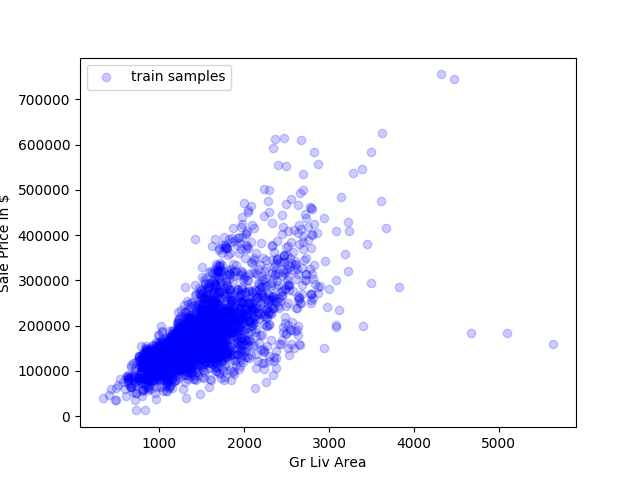

<IPython.core.display.Javascript object>


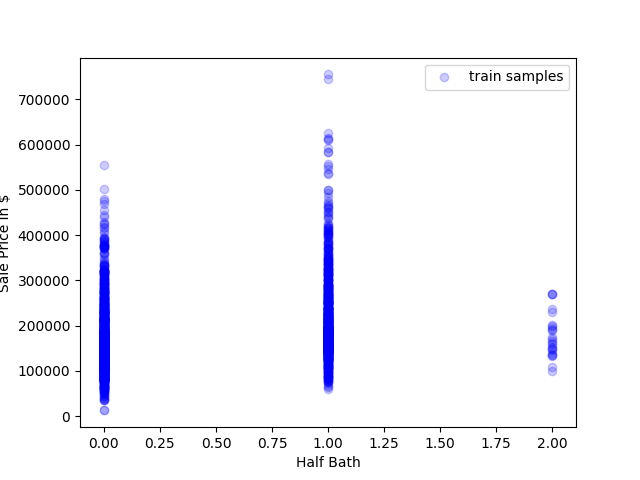

<IPython.core.display.Javascript object>


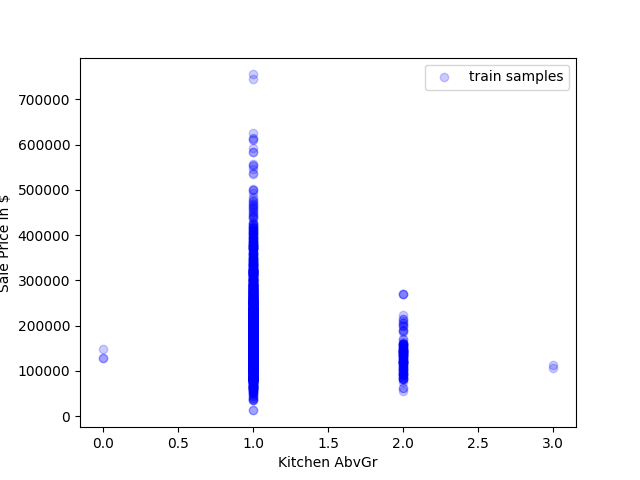

<IPython.core.display.Javascript object>


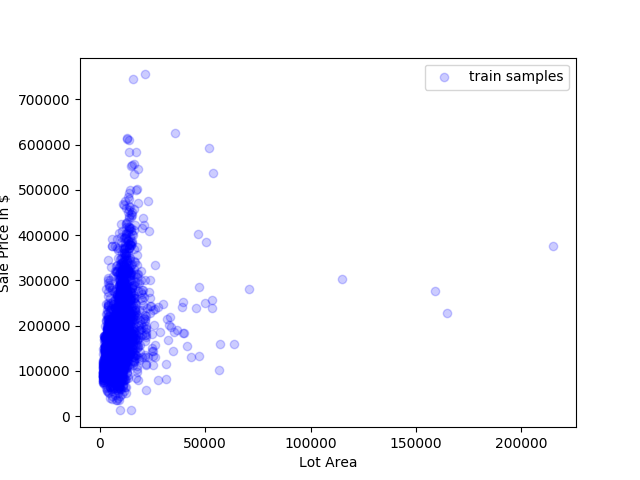

<IPython.core.display.Javascript object>


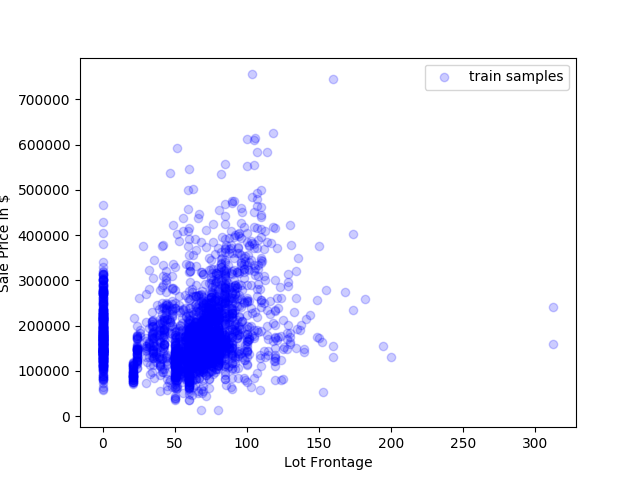

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


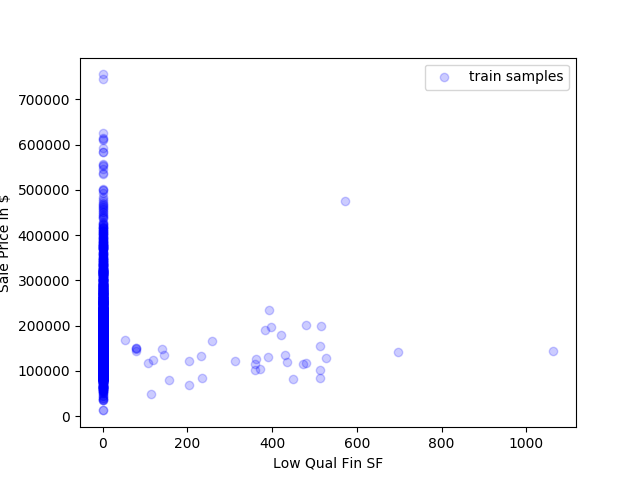

<IPython.core.display.Javascript object>


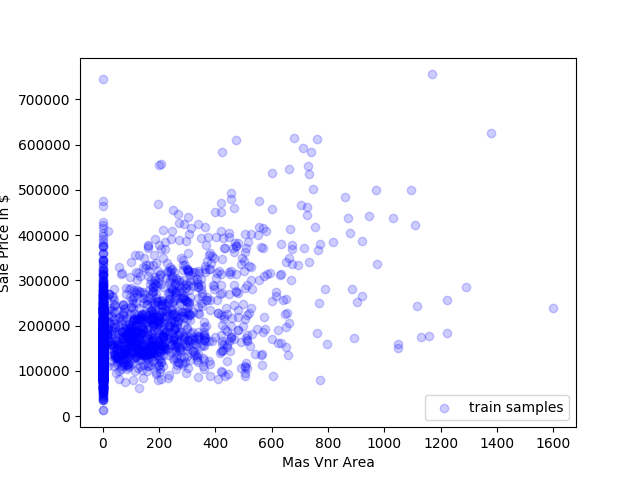

<IPython.core.display.Javascript object>


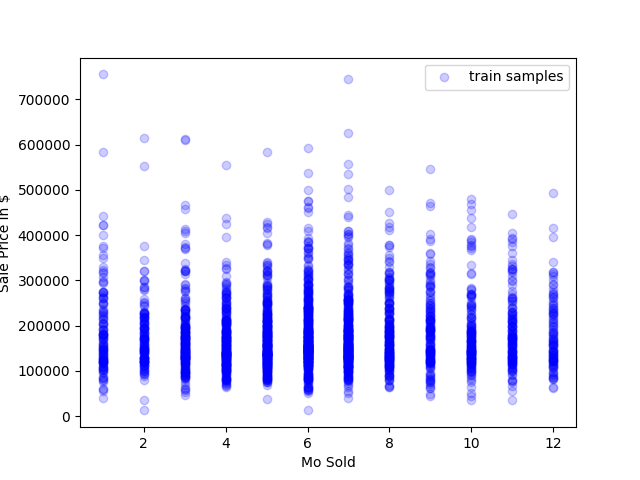

<IPython.core.display.Javascript object>


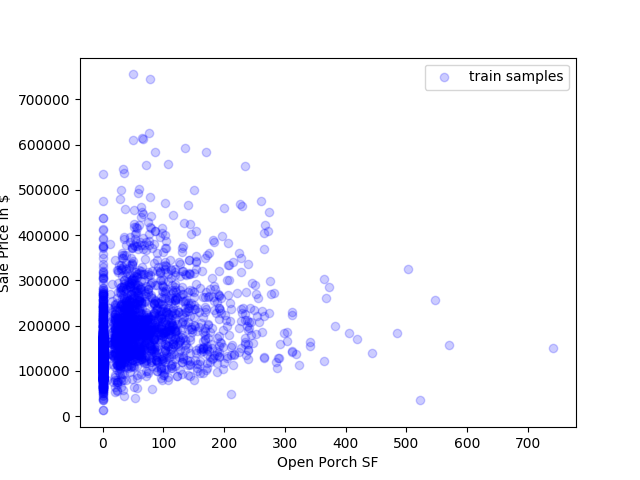

<IPython.core.display.Javascript object>


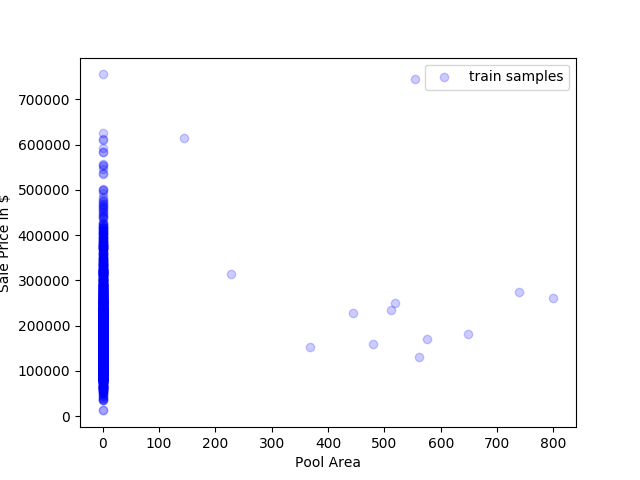

<IPython.core.display.Javascript object>


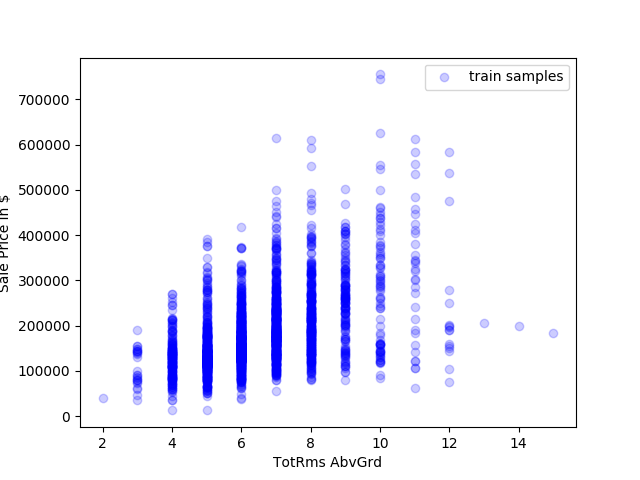

<IPython.core.display.Javascript object>


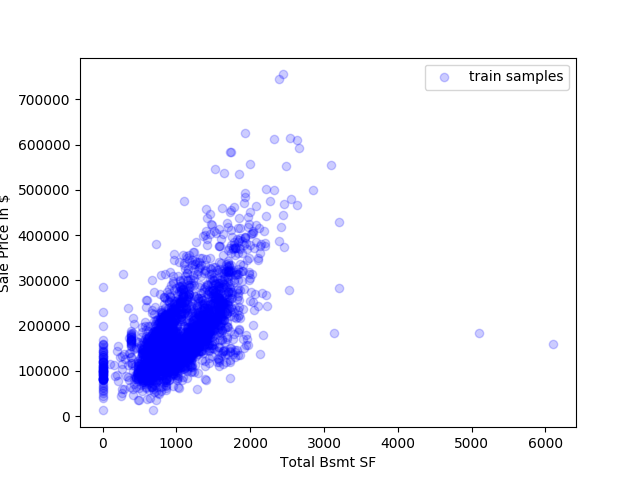

<IPython.core.display.Javascript object>


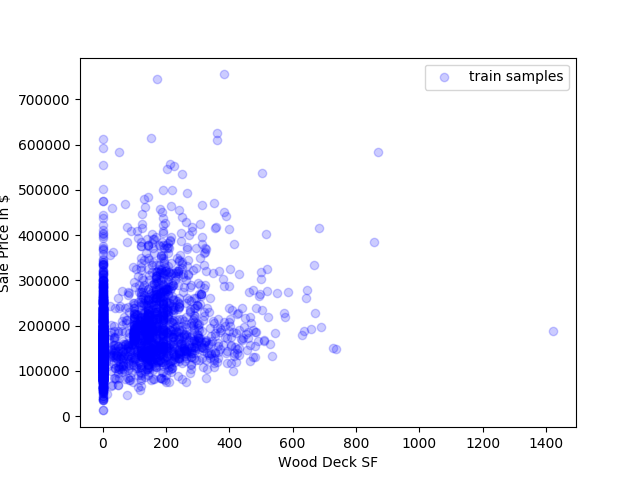

<IPython.core.display.Javascript object>


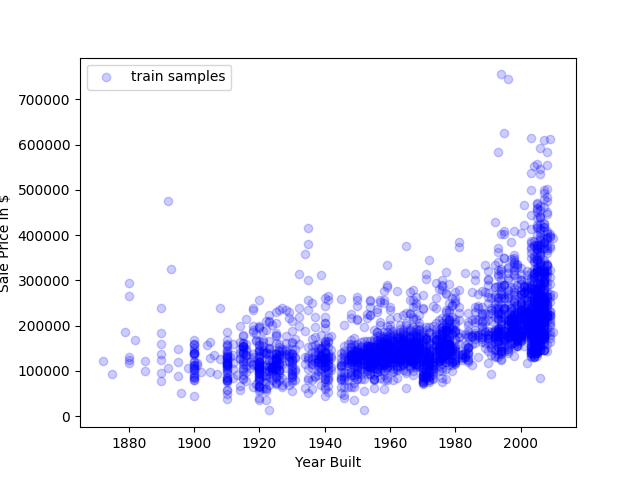

<IPython.core.display.Javascript object>


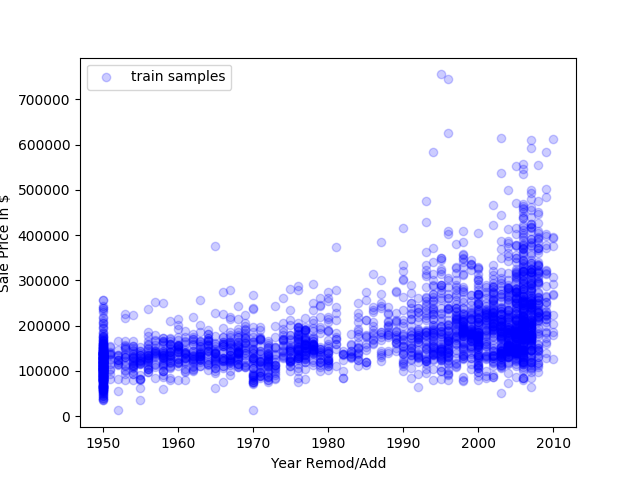

<IPython.core.display.Javascript object>


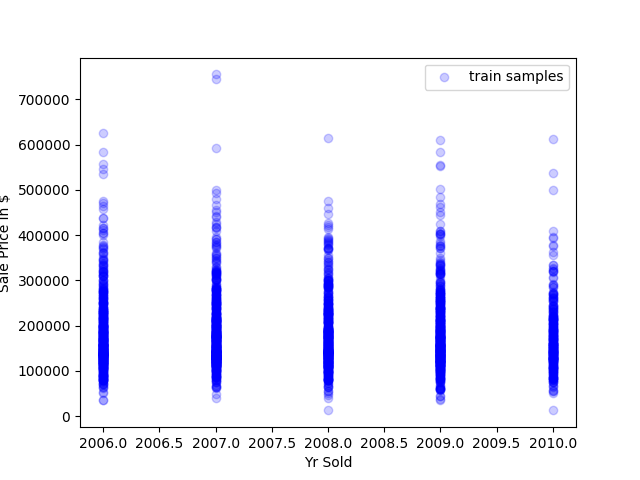

In [107]:
# Notes:
# Data not strongly correllate
# remove 'Bsmt Unf SF',
# adjust 'Garage Yr Blt' - notice poor logic of replacing NA values with 0 - created outliers/data scaling issue
# watch out for scaling - Lot Area
%matplotlib notebook
print(len(columns))
for i in range(0,len(columns)):
    # Plot outputs
    plt.figure(i)
    plt.scatter(X[:,i], y, alpha=.2, color='blue', label='train samples')
#     plt.scatter(housing_X_train[:,i], housing_y_train, alpha=.3, color='black', label='train samples')
#     plt.scatter(housing_X_test[:,i], housing_y_test, alpha=.3, color='red', label='test samples')
#     plt.scatter(housing_X_test[:,i], housing_y_pred_nn,color='magenta', linewidth=1, alpha=.5, label='predictions')

    plt.xticks()
    plt.yticks()
    plt.legend()
    plt.xlabel(columns[i])
    plt.ylabel('Sale Price in $')

    plt.show()

In [119]:
# Variance scores or Linear Regression vs NN
score1 = r2_score(housing_y_test, housing_y_pred)
score2 = r2_score(housing_y_test_nn, housing_y_pred_nn)
print('Linear Regression (Single variable) VARIANCE',round(score1,2))
print('NN MLP Regression (Multi variable) VARIANCE',round(score2,2))
answer = score2/score1
print("\nNN multivarate model Variance is {:0.2f}x better than 1 variable linear regresson".format(answer))
answer = ((score2-score1)/score1)*100
print("NN multivarate model Variance is {:0.0f}% better than 1 variable linear regresson\n".format(answer))


Linear Regression (Single variable) VARIANCE 0.51
NN MLP Regression (Multi variable) VARIANCE 0.82

NN multivarate model Variance is 1.62x better than 1 variable linear regresson
NN multivarate model Variance is 62% better than 1 variable linear regresson



<IPython.core.display.Javascript object>


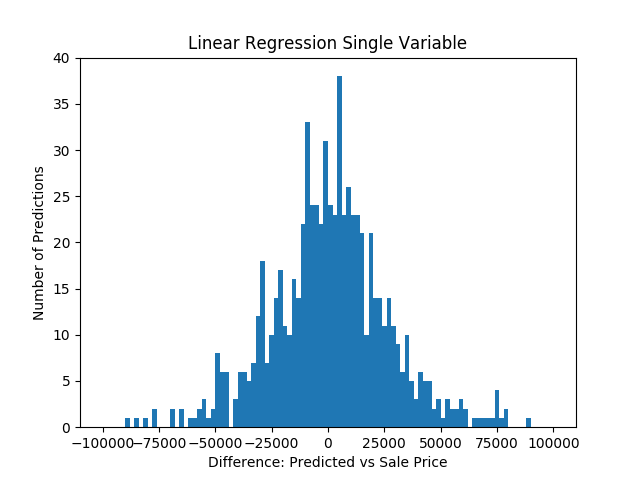

In [149]:
%matplotlib notebook
# Plot histogram of difference between predicted & actual sale price outputs
y_nn = np.reshape(housing_y_test_nn,housing_y_test_nn.shape[0])
yhat_nn = np.reshape(housing_y_pred_nn,housing_y_pred_nn.shape[0])
ydiff = np.subtract(y_nn,yhat_nn)

plt.ylim([0,40])
plt.hist(ydiff,bins=100,range=[-100000, 100000])

plt.title('Neural Net MLP Muli Variable')
plt.xlabel('Difference: Predicted vs Sale Price')
plt.ylabel('Number of Predictions')

plt.show()

<IPython.core.display.Javascript object>


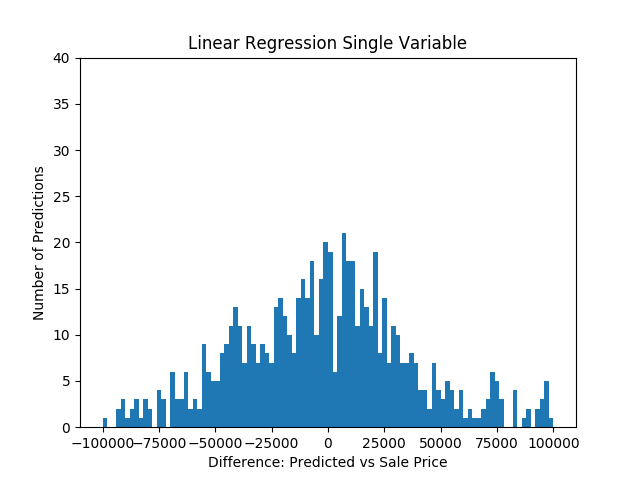

In [150]:
%matplotlib notebook
# Plot hist of predictions vs actual
y_lr = np.reshape(housing_y_test,housing_y_test.shape[0])
yhat_lr = np.reshape(housing_y_pred,housing_y_pred.shape[0])
ydiff_lr = np.subtract(y_lr,yhat_lr)

plt.ylim([0,40])
plt.hist(ydiff_lr,bins=100,range=[-100000, 100000])
plt.title('Linear Regression Single Variable')
plt.xlabel('Difference: Predicted vs Sale Price')
plt.ylabel('Number of Predictions')

plt.show()

## Next Up
[Data Pruning](/notebooks/06%20-%20Data%20Pruning.ipynb)